# Homework Assignment 3
## Regression models

### <p style="text-align: right;"> &#9989; Nick Sleeper
### <p style="text-align: right;"> &#9989; Sleepah

### Goal for this homework assignment
By now, you have learned a bit about regression models. In this assignment, you will practice:

* Using branches in Git
* Performing linear regression
* Performing multiple regression
* Performing logistic regression

**This assignment is due by 11:59 pm on Friday, November 10th.** It should be uploaded into the "Homework Assignments" submission folder for Homework 3.  Submission instructions can be found at the end of the notebook. **There are 79 standard points possible in this assignment. The distribution of points can be found in the section headers**.


---
## Part 1: Git Branch (6 points)

<img src="https://as2.ftcdn.net/v2/jpg/02/31/83/69/1000_F_231836961_dt3tbN1MKbVRGz0RLSnWuC0U8MFeLx8o.jpg" width=300px align="right" style="margin-left: 20px">

For this assignment, you're going to add it to the `cmse202-f23-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-f23-turnin` **local** repository and create a new directory called `hw-03`

2. Move this notebook into that **new directory** in your repository, but **do not** add or commit it to your repository yet.

3. Create a **new branch** called `hw03_branch` (The Day 16 PCA and ICA content has information on how to do this).

4. "Check out" the new branch (so that you'll be working on that branch). 

5. Double check to make sure you are actually on that branch.

6. Once you're certain you're working on your new branch, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw03_branch` to push your new branch to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

<font size=6 color="#009600">&#9998;</font> git clone https://github.com/sleepah/cmse202-f23-turnin.git

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f23-turnin`" repository inside the `hw-03` directory that you just created within the new branch `hw03-branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.


---
## Part 2: Loading the Palmer Penguins Dataset (9 points)

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width=400px align="right" style="margin-left: 20px" alt="The Palmer Penguis, image credit: https://allisonhorst.github.io/palmerpenguins/">

For the vast majority of this homework, you'll be working with the Palmer Penguins dataset, which contains measurements of three species of penguins (Adélie, Chinstrap, and Gentoo) collected by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network. 

Note, that while Parts 3, 4, and 5 are designed to be workable independent of each other, you'll definitely want to finish Part 2 before attempting Parts 3, 4, or 5. To get started on Part 2, **you'll need to download the following file**:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/penguins_size.csv`

&#9989; **Question 2.1 (1 point)**: **Do this:** Save the `penguins.csv` file in the same directory as your notebook. **Then, in the cell below, put the command line command(s) you used to download the file.** If you did not use a command line tool to download the file, write down the command(s) that *would* have downloaded the file.

``` bash
curl -o penguins_size.csv https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/penguins_size.csv
```

&#9989;  **Question 2.2 (2 points)**: Next, load the data into a Pandas DataFrame and display the first and last 5 rows. 

In [1]:
import pandas as pd
df = pd.read_csv('penguins_size.csv')
print("First 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())

First 5 rows:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  

Last 5 rows:
    species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
339  Gentoo  Biscoe             NaN            NaN                NaN   
340  Gentoo  Biscoe            46.8           14.3              215.0   
341  Gentoo  Biscoe            50.4           15.7              222.0   
342  Gentoo  Biscoe            45.2           14.8              212.0   
343  Gentoo 

&#9989;  **Question 2.3 (2 points)**: You should notice that a few of rows have `NaN` values. Some penguins don't like to stay still long enough to be measured <("). Drop these rows from the DataFrame and redisplay the dataframe to show that these rows were removed.

In [2]:
df_cleaned = df.dropna()
print(df_cleaned)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  
1         3800.0  FEMALE  
2     

&#9989;  **Question 2.4 (4 points)**: Recall that this dataset has data on three different species of penguins. Although all three species are from the genus Pygoscelis, they are in fact very different. 

**Do This:** Split the data into three new DataFrames, one with just the rows with Adélie penguins, one with just the rows with Chinstrap penguins, and one with just the rows with Gentoo penguins. Display at least one of these DataFrames to convince yourself that your code worked.

In [3]:
adelie_df = df[df['species'] == 'Adelie']
chinstrap_df = df[df['species'] == 'Chinstrap']
gentoo_df = df[df['species'] == 'Gentoo']
print("Adélie Penguins DataFrame:")
print(adelie_df.head())

Adélie Penguins DataFrame:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 2 complete", and push the changes to GitHub.

---

---
## Part 3: One Variable Linear Regression (26 points)

In this part, we'll perform some one-variable linear regression analysis on the penguin data.

&#9989;  **Question 3.1 (3 points)**: Using the `OLS` method in `statsmodels`, perform a linear regression to predict a penguin's body mass using its bill depth and **display the results summary**. Remember that you may need to use the `add_constant()` method to make sure `OLS` fits a general line $y = ax+b$ to the data instead of a line through the origin $y = ax$. 

**For this problem, make sure that you're using the full penguin dataset, not just the dataframe for a single species.**

In [4]:
import pandas as pd
import statsmodels.api as sm

df_clean = df.dropna()
X = df_clean['bill_depth_mm']  
y = df_clean['body_mass_g']    

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     95.68
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           5.07e-20
Time:                        17:39:24   Log-Likelihood:                -2665.8
No. Observations:                 334   AIC:                             5336.
Df Residuals:                     332   BIC:                             5343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7528.6205    341.587     22.040

&#9989;  **Question 3.2 (3 points)**: Answer the following questions: 

1. What was the equation of the best fit linear relationship between a penguin's body mass and its bill depth?

2. As a penguin's bill depth increases, does its body mass increase or decrease? What tells you this?

3. Based on the $p$-value for the bill depth, is the relationship you found between a penguin's body mass and bill depth statistically significant? Justify yor answer.

<font size=+3>&#9998;</font> Put your answers here: <br>
1. Body Mass (g)=7528.6205−193.4424×Bill Depth (mm) <br>
2. As a penguin's bill depth increases, its body mass decreases. This is indicated by the negative coefficient (-193.4424) of the bill depth variable. <br>
3. In this output, the p-value for bill depth is lower than 0.05. This very small p-value suggests that the relationship between bill depth and body mass is statistically significant. It indicates that the likelihood of observing such a strong association between bill depth and body mass by chance is very low, thus confirming the significance of the relationship in this dataset.

# &#9989;  **Question 3.3 (6 points, 2 points per part)**: Now, let's repeat the linear regression, but for each species separately.  It will likely help you later in this question to make sure that the variable names for the OLS model and OLS results are different for each species. That way, you won't overwrite one model with another.

&#9989;  **Question 3.3.Adélie (2 points)**: Using the `OLS` method in `statsmodels`, perform a linear regression to predict an  **Adélie** penguin's body mass using its bill depth and display the results summary.

In [8]:
import numpy as np
adelie_df_clean = adelie_df.dropna(subset=['bill_depth_mm', 'body_mass_g'])
X_adelie = adelie_df_clean['bill_depth_mm']
y_adelie = adelie_df_clean['body_mass_g']
X_adelie = X_adelie.replace([np.inf, -np.inf], np.nan).dropna()
y_adelie = y_adelie.replace([np.inf, -np.inf], np.nan).dropna()
X_adelie = sm.add_constant(X_adelie)
model_adelie = sm.OLS(y_adelie, X_adelie).fit()
print(model_adelie.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     74.03
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           9.94e-15
Time:                        17:47:42   Log-Likelihood:                -1108.6
No. Observations:                 151   AIC:                             2221.
Df Residuals:                     149   BIC:                             2227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -283.2787    464.033     -0.610

&#9989;  **Question 3.3.Chinstrap (2 points)**: Using the `OLS` method in `statsmodels`, perform a linear regression to predict a  **Chinstrap** penguin's body mass using its bill depth and display the results summary.

In [10]:
import numpy as np
import statsmodels.api as sm

chinstrap_df_clean = chinstrap_df.dropna(subset=['bill_depth_mm', 'body_mass_g'])
X_chinstrap = chinstrap_df_clean['bill_depth_mm']
y_chinstrap = chinstrap_df_clean['body_mass_g']
X_chinstrap = X_chinstrap.replace([np.inf, -np.inf], np.nan).dropna()
y_chinstrap = y_chinstrap.replace([np.inf, -np.inf], np.nan).dropna()

X_chinstrap = sm.add_constant(X_chinstrap)
model_chinstrap = sm.OLS(y_chinstrap, X_chinstrap).fit()
print(model_chinstrap.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     38.01
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           4.79e-08
Time:                        17:49:38   Log-Likelihood:                -485.22
No. Observations:                  68   AIC:                             974.4
Df Residuals:                      66   BIC:                             978.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -36.2192    612.561     -0.059

&#9989;  **Question 3.3.Gentoo (2 points)**: Using the `OLS` method in `statsmodels`, perform a linear regression to predict a  **Gentoo** penguin's body mass using its bill depth and display the results summary.

In [12]:
import numpy as np
import statsmodels.api as sm

gentoo_df_clean = gentoo_df.dropna(subset=['bill_depth_mm', 'body_mass_g'])
X_gentoo = gentoo_df_clean['bill_depth_mm']
y_gentoo = gentoo_df_clean['body_mass_g']
X_gentoo = X_gentoo.replace([np.inf, -np.inf], np.nan).dropna()
y_gentoo = y_gentoo.replace([np.inf, -np.inf], np.nan).dropna()

X_gentoo = sm.add_constant(X_gentoo)
model_gentoo = sm.OLS(y_gentoo, X_gentoo).fit()
print(model_gentoo.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     129.6
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           7.48e-21
Time:                        17:51:08   Log-Likelihood:                -894.67
No. Observations:                 123   AIC:                             1793.
Df Residuals:                     121   BIC:                             1799.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -458.9852    487.307     -0.942

&#9989;  **Question 3.4 (5 points)**: Answer the following questions: 

1. For each of the three species of penguins, what was the equation of the best fit linear relationship between the species' body mass and bill depth?

2. For each of the three species of penguins, as its bill depth increases, does its body mass increase or decrease? 

3. Based on the $p$-values for the bill depth, is the relationship between each species' body mass and bill depth statistically significant?

<font size=+3>&#9998;</font> Put your answers here: <br>
1. Adélie Penguin: Body Mass (g) = -283.2787 + 217.1516 * Bill Depth (mm) <br>
Chinstrap Penguin: Body Mass (g) = -36.2192 + 204.6247 * Bill Depth (mm) <br>
Gentoo Penguin: Body Mass (g) = -458.9852 + 369.4406 * Bill Depth (mm) <br>
2. Adélie Penguin: As the bill depth increases, the body mass increases. <br>
Chinstrap Penguin: As the bill depth increases, the body mass increases. <br>
Gentoo Penguin: As the bill depth increases, the body mass increases. <br>
3. Adélie Penguin: The relationship is statistically significant (p-value < 0.05). <br>
Chinstrap Penguin: The relationship is statistically significant (p-value < 0.05). <br>
Gentoo Penguin: The relationship is statistically significant (p-value < 0.05). <br>

&#9989;  **Question 3.5 (6 points)**: Assuming you did everything correctly, the relationship between a penguin's body mass and it's bill depth is the opposite when you split the data by species. This might seem confusing to you. Part of the reason for this is because we skipped a very important step regarding dealing with unfamiliar data, that is **visualizing the data**. 

**Do this**: Make a scatterplot showing the penguins' body mass vs. bill depth. Color code the dots so that each species gets a different color. Then, display the best fit line for each of the three species using the same color and display the best fit line for all the penguins using a different color. Don't forget to label your axes. When you're done, you should have a plot that contains three different colors of dots and 4 different lines (3 of the lines should match the colors of the three penguin species, respectively)

**Hint**: We've included a function to help you plot a line. Feel free to use it, or not. 

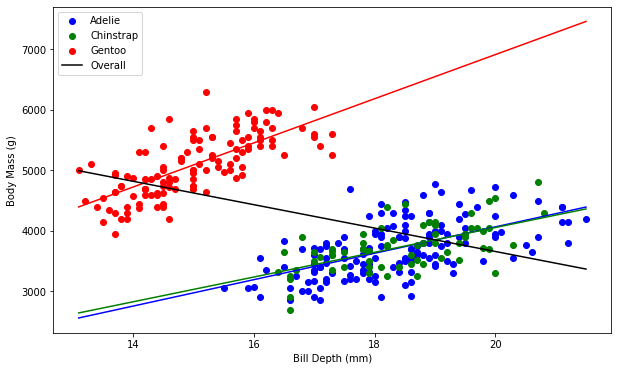

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

def plot_line(slope, intercept, xmin, xmax, color, label=None):
    xline = np.linspace(xmin, xmax, 100) 
    yline = slope * xline + intercept
    plt.plot(xline, yline, color=color, label=label)

df = pd.read_csv('penguins_size.csv')
df = df.dropna()
X_overall = sm.add_constant(df['bill_depth_mm'])
model_overall = sm.OLS(df['body_mass_g'], X_overall).fit()

models = {}
for species in df['species'].unique():
    df_species = df[df['species'] == species]
    X_species = sm.add_constant(df_species['bill_depth_mm'])
    model = sm.OLS(df_species['body_mass_g'], X_species).fit()
    models[species] = model

plt.figure(figsize=(10, 6))

colors = {'Adelie': 'blue', 'Chinstrap': 'green', 'Gentoo': 'red'}
for species, color in colors.items():
    df_species = df[df['species'] == species]
    plt.scatter(df_species['bill_depth_mm'], df_species['body_mass_g'], c=color, label=species)

for species, model in models.items():
    plot_line(model.params['bill_depth_mm'], model.params['const'],
              df['bill_depth_mm'].min(), df['bill_depth_mm'].max(), color=colors[species])

plot_line(model_overall.params['bill_depth_mm'], model_overall.params['const'],
          df['bill_depth_mm'].min(), df['bill_depth_mm'].max(), color='black', label='Overall')

plt.xlabel('Bill Depth (mm)')
plt.ylabel('Body Mass (g)')
plt.legend()
plt.show()

&#9989;  **Question 3.6 (3 points)**: Now that you've visualized the data, can you give an explaination as to why the relationship between a penguin's body mass and bill depth changed drastically when we split the data by species?

<font size=+3>&#9998;</font> Put your answers here: <br>
The change in the relationship between body mass and bill depth when we separate the data by penguin species is a great example of why it's important to consider the context of data. Penguins come in different species, each with unique body characteristics. Gentoo penguins are generally larger and have deeper bills compared to Adélie and Chinstrap penguins. When we look at all the penguins together, the larger size of the Gentoos might skew our perception, making it seem like penguins with deeper bills always weigh more. However, when we split the data by species, we see the true story for each group. 

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 3 complete", and push the changes to GitHub.

---

## Part 4: Multiple Regression (20 points)

In this part, we'll use multiple features to predict the body mass of a Chinstrap penguin. 

&#9989;  **Question 4.1 (3 points)**: Using the `OLS` method in `statsmodels`, perform a multivariable linear regression to predict a  **Chinstrap** penguin's body mass given just its bill length, bill depth, and flipper length. Be sure to use the `add_constant()` method to ensure `OLS` includes a constant term in its model. As before, make sure to **display a summary of your results**.

In [14]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('penguins_size.csv')
chinstrap_df = df[df['species'] == 'Chinstrap'].dropna()

predictors = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
X_chinstrap = chinstrap_df[predictors]
y_chinstrap = chinstrap_df['body_mass_g']

X_chinstrap = sm.add_constant(X_chinstrap)
model_chinstrap_multi = sm.OLS(y_chinstrap, X_chinstrap).fit()
print(model_chinstrap_multi.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     21.66
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           8.48e-10
Time:                        18:50:49   Log-Likelihood:                -476.86
No. Observations:                  68   AIC:                             961.7
Df Residuals:                      64   BIC:                             970.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3157.5301    932.36

&#9989;  **Question 4.2 (4 points)**: Answer the following questions: 

1. Suppose the Chinstrap penguin in the image above has a bill length of 52.0 mm, a bill depth of 20.7 mm, and a flipper length of 210.0 mm. What does your linear model predict the Chinstrap penguin's body mass (in g) is? Explain how you got your answer.

2. For each of the features, specify if it is statistically significant or not. Briefly justify your answers.

In [15]:
intercept = -3157.5301
coef_bill_length = 16.0392
coef_bill_depth = 91.5127
coef_flipper_length = 22.5797

bill_length = 52.0
bill_depth = 20.7
flipper_length = 210.0

predicted_body_mass = (intercept +
                       coef_bill_length * bill_length +
                       coef_bill_depth * bill_depth +
                       coef_flipper_length * flipper_length)
predicted_body_mass

4312.55819

<font size=+3>&#9998;</font> 1. Based on my linear model the predicted body mass would be around 4300 g's. <br>

2. Bill Length (mm): This feature has a p-value of 0.241, which is greater than the typical alpha level of 0.05 used to determine statistical significance. Therefore, we do not have sufficient evidence to conclude that bill length has a significant impact on the body mass of Chinstrap penguins within this model. <br>

Bill Depth (mm): This feature has a p-value of 0.038, which is less than 0.05, indicating that bill depth is statistically significant and has a significant impact on the body mass of Chinstrap penguins in this model. <br>

Flipper Length (mm): With a p-value of 0.000, flipper length is highly statistically significant. It suggests that the flipper length has a strong and significant impact on the body mass of Chinstrap penguins. <br>

&#9989;  **Question 4.3 (3 points)**: Perform the same multivariable linear regression again, but this time with just the **two most significant features**. Even if you got that 0, 1, or 3 of the features were significant, just pick the two you think are most significant for this question. Display the summary of these results.

In [17]:
significant_predictors = ['bill_depth_mm', 'flipper_length_mm']
X_chinstrap_significant = chinstrap_df[significant_predictors]
y_chinstrap = chinstrap_df['body_mass_g']

X_chinstrap_significant = sm.add_constant(X_chinstrap_significant)
model_chinstrap_significant = sm.OLS(y_chinstrap, X_chinstrap_significant).fit()
print(model_chinstrap_significant.summary())

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     31.59
Date:                Fri, 10 Nov 2023   Prob (F-statistic):           2.60e-10
Time:                        18:55:59   Log-Likelihood:                -477.60
No. Observations:                  68   AIC:                             961.2
Df Residuals:                      65   BIC:                             967.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -3076.8564    932.74

&#9989;  **Question 4.4 (4 points)**: Answer these questions: 

1. Qualitatively, how much better/worse is the reduced model compared to the original model? Briefly justify your answer.

2. Explain in your own words why we might want to use a model with fewer features, even if it fits the data a bit worse than a model with more features.

<font size=+3>&#9998;</font> 1. The reduced model, which uses only bill depth and flipper length to predict the body mass of Chinstrap penguins, has an R-squared value of 0.493 compared to the original model's R-squared of 0.504.So only slightly better but technically statistally significant. <br>
2. A simpler model is typically easier to interpret and use, which is particularly beneficial when explaining the results to those who may not have a technical background. It also reduces the risk of overfitting, where a model learns the random fluctuations in the training data rather than the true underlying patterns. 

&#9989;  **Question 4.5 (2 points)**: Suppose we wanted to use the sex of a Chinstrap penguin as a feature to predict its body mass. Will simply including the `sex` column in the second argument to `OLS()` work? If not, why, and what could we do to fix it?

<font size=+3>&#9998;</font> Simply including the sex column in the second argument to OLS() will not work directly because the sex of a penguin is a categorical variable, and OLS requires numerical input for all variables. In statistical models, categorical variables must be converted into a numerical form before they can be used in the model. 

&#9989;  **Question 4.6 (4 points)**: A student from U of M managed to enroll in this class (don't ask us how) and is working on this homework. They got the following output when they used the `OLS()` method in `statsmodels.api`. 

<img src="https://i.ibb.co/SRs1MRM/Perfect-Model-Chinstrap.png" width="400px" border="0">

When you compare outputs, the Wolverine tells you "My linear model is better than yours because my linear model has a larger $R^2$-value than your model. I guess Wolverines are way better than Spartans at data science."

**Do this**: Answer These Questions:
1. How did they get a linear model with a near perfect $R^2$-value? 
2. Is their model actually better than yours? 

Justify your answers.

<font size=+3>&#9998;</font> 1. They potentially might have gotten a near perfect R^2 value because of: <br>
Overfitting: The model may be overfitting the data, capturing not only the true underlying relationship but also the noise. This would mean it's learning the training data too well, including any anomalies or random fluctuations.
Data Leakage: There might be data leakage where the model has access to information it shouldn't have during training, perhaps due to including the target variable as a feature by mistake. Very Small Dataset: With a very small and non-representative dataset, a model might appear to perform exceptionally well by chance. <br>
2. Despite the impressive R^2 value, the model is likely not better if the perfect score is due to overfitting, data leakage, small data set, or errors in data handling. Such a model would perform poorly on unseen data because it's not generalizing from the training data but rather memorizing it. 

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 4 complete", and push the changes to GitHub.

---

## Part 5: Logistic Regression (18 points)

In this part, we'd like to use logistic regression to classify the species of a penguin given it's body measurements. Logistic regression (as we've learned so far in class) does binary classification. However, we have three species of penguins, and they are not very happy when they are mistaken for another species.

<img src="https://i.redd.it/q09631arghi41.jpg" width="400px">

&#9989;  **Question 5.1 (4 points)**: Let's start by making a classifier to distinguish Adélie penguins from the other two species (Chinstrap penguins and Gentoo penguins). 

**Do This**: Double check that you still have the DataFrame from Question 2.3 intact, i.e. it has data from all three species, but with the NaN rows dropped. Then, create a `Pandas` `Series` called `labels` which takes the `species` column of the DataFrame, but replaces 'Chinstrap' and 'Gentoo' with 0 and replaces 'Adelie' with 1. Also, create a `Pandas` `DataFrame` called `features` which consists of just the four columns bill length, bill depth, flipper length, and body mass. Display the labels and features to make sure you did this correctly.

In [26]:
df_clean = df.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

labels = df_clean['species'].replace({'Chinstrap': 0, 'Gentoo': 0, 'Adelie': 1})

features_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
features = df_clean[features_columns]

print(labels.head())
print(features.head())

0    1
1    1
2    1
4    1
5    1
Name: species, dtype: int64
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            39.1           18.7              181.0       3750.0
1            39.5           17.4              186.0       3800.0
2            40.3           18.0              195.0       3250.0
4            36.7           19.3              193.0       3450.0
5            39.3           20.6              190.0       3650.0


&#9989;  **Question 5.2 (4 points)**: Split your data into a training and testing set with a training set representing 75% of your data. For reproducibility, set the `random_state` argument to `0`. Print the shapes of the training features, the testing features, the training labels, and the testing labels to show you have the right number of entries in each of the four variables.

In [27]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.25, random_state=0
)

# Print the shapes of the training and testing data to confirm the split
print("Training features shape:", features_train.shape)
print("Testing features shape:", features_test.shape)
print("Training labels shape:", labels_train.shape)
print("Testing labels shape:", labels_test.shape)


Training features shape: (256, 4)
Testing features shape: (86, 4)
Training labels shape: (256,)
Testing labels shape: (86,)


&#9989;  **Question 5.3 (4 points)**: Now, train a logistic regression model using your training features and training labels. **Display the summary**.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm


features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.25, random_state=0
)

features_train_with_const = sm.add_constant(features_train)

logit_model = sm.Logit(labels_train, features_train_with_const)

result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.017729
         Iterations 14
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  256
Model:                          Logit   Df Residuals:                      251
Method:                           MLE   Df Model:                            4
Date:                Fri, 10 Nov 2023   Pseudo R-squ.:                  0.9739
Time:                        23:40:31   Log-Likelihood:                -4.5387
converged:                       True   LL-Null:                       -173.98
Covariance Type:            nonrobust   LLR p-value:                 4.387e-72
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                26.5578     26.791      0.991      0.322     -25.952      79.068
bill_le

&#9989;  **Question 5.4 (4 points)**: Finally, test your logistic regression model using your testing features and testing labels. Display the fraction of testing data points that were correctly predicted. 

In [31]:
from sklearn.metrics import accuracy_score
import statsmodels.api as sm

# Assuming features_train, labels_train, features_test, and labels_test are already defined

# Train the logistic regression model using statsmodels
features_train_with_const = sm.add_constant(features_train)
logit_model = sm.Logit(labels_train, features_train_with_const)
logistic_model = logit_model.fit(disp=0)  # disp=0 turns off the convergence messages

# Predict the labels for the testing set
features_test_with_const = sm.add_constant(features_test)
labels_pred = logistic_model.predict(features_test_with_const)

# Convert probabilities to binary outcomes
labels_pred_binary = [1 if x > 0.5 else 0 for x in labels_pred]

# Calculate the accuracy
accuracy = accuracy_score(labels_test, labels_pred_binary)

# Display the accuracy
print("Accuracy:", accuracy)

Accuracy: 1.0


&#9989;  **Question 5.5 (2 points)**: If everything worked correctly, you should have a classifier that can distinguish Adélie penguins from the other two species with high accuracy! Now, suppose you wanted to write code that would take a penguins measurements (bill length, bill depth, flipper length, and body mass) and predict which of the three species the penguin was. Describe how you would do this. **Note**: You don't need to actually implement this with code, you simply need to have a sufficiently detailed plan for how you *could* do it. 

<font size=+3>&#9998;</font> To predict the species of a penguin based on its measurements (bill length, bill depth, flipper length, and body mass), I would extend the current binary classifier into a multi-class classifier. Since we already have a model that can distinguish Adélie penguins from the other two species, I would create two additional binary classifiers: one to distinguish Chinstrap from Gentoo and Adélie, and another to distinguish Gentoo from Chinstrap and Adélie. Each classifier would be trained on labeled data where the target species is labeled as 1 and the others as 0.

When a set of measurements is provided, I would pass these measurements as input to all three classifiers after standardizing the features (if the model requires it). Each classifier would output a probability of the penguin belonging to its target species. I would then use a decision rule, such as picking the species with the highest probability, to make the final prediction. If the first classifier is highly confident that the penguin is an Adélie, the decision can be made immediately. Otherwise, the other two classifiers' probabilities would be considered.

**"Assistance with the code generation and troubleshooting for data analysis and logistic regression modeling was provided by ChatGPT from OpenAI."**

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 5 complete", and push the changes to GitHub.

---

## Part 1. Continued

Now that you've finished your new "development" on your 202 turn-in repo, you can merge your work back into your `main` branch.

**&#9989; Do the following**:

7. Switch back to your `main` branch. 
8. Merge your `hw03_branch` with your `main` branch. 
9. Finally, push the changes to GitHub.

---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [32]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/UsXJF7EeNY" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

<img src=https://education.rstudio.com/blog/2020/07/palmerpenguins-cran/penguins_cran.png width=200px>

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework 3, and upload it there.

&#169; Copyright 2023,  Department of Computational Mathematics, Science and Engineering at Michigan State University